In [25]:
import pandas as pd
df = pd.read_csv('user_reviews.csv')
df.head()

,Unnamed: 0,comment,rating_star,translated_comments
0,10,super ganda po,5,super nice
1,14,ganda namn,5,ganda namn
2,17,super ganda,5,super double
3,20,ang ganda po lahat ng items at ang ganda ng te...,5,"all the items are nice and the fabric is nice,..."
4,21,hindi naman sya ung nasa pic na order ko dissa...,1,"he's not the one in the pic in my order, it's ..."


In [26]:
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['comment'])

In [27]:
df.head()

,rating_star,translated_comments
0,5,super nice
1,5,ganda namn
2,5,super double
3,5,"all the items are nice and the fabric is nice,..."
4,1,"he's not the one in the pic in my order, it's ..."


In [29]:
category = pd.get_dummies(df.rating_star)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='rating_star')
df_baru.head()

,translated_comments,1,2,3,4,5
0,super nice,0,0,0,0,1
1,ganda namn,0,0,0,0,1
2,super double,0,0,0,0,1
3,"all the items are nice and the fabric is nice,...",0,0,0,0,1
4,"he's not the one in the pic in my order, it's ...",1,0,0,0,0


In [30]:
df_baru.rename(columns = {1 : 'Very Bad', 2 : 'Bad', 3 : 'Enough', 4 : 'Good', 5 : 'Very Good'}, inplace = True)
df_baru

,translated_comments,Very Bad,Bad,Enough,Good,Very Good
0,super nice,0,0,0,0,1
1,ganda namn,0,0,0,0,1
2,super double,0,0,0,0,1
3,"all the items are nice and the fabric is nice,...",0,0,0,0,1
4,"he's not the one in the pic in my order, it's ...",1,0,0,0,0
...,...,...,...,...,...,...
20032,the items were beautiful and the designs and c...,0,0,0,0,1
20033,"I'm not really disappointed by the seller, it'...",0,0,0,0,1
20034,very nice quality good for its price very nice...,0,0,0,0,1
20035,the items I received are very nice and I will ...,0,0,0,0,1


In [31]:
comments = df_baru['translated_comments'].values
ratings = df_baru[['Very Bad', 'Bad', 'Enough', 'Good', 'Very Good']].values
print("Comments :")
print(comments)
print("")
print("Ratings :")
print(ratings)

Comments :
['super nice' 'ganda namn' 'super double' ...
 'very nice quality good for its price very nice quality very nice quality very nice quality very nice quality very nice quality very nice quality very nice quality very nice quality'
 'the items I received are very nice and I will definitely repeat when you order here.'
 'everything is beautiful, the fabric is also beautiful, no damage, everything is okay, so I always order here because all their items are beautiful and cheap, everything is also correct for me, thanks to the seller for repeating']

Ratings :
[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [32]:
from sklearn.model_selection import train_test_split
comment_latih, comment_test, rating_latih, rating_test = train_test_split(comments, ratings, test_size=0.2)

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(comment_latih) 
tokenizer.fit_on_texts(comment_test)
 
print("sequences latih :")
sequences_latih = tokenizer.texts_to_sequences(comment_latih)
print(sequences_latih, "\n")

print("sequences test :")
sequences_test = tokenizer.texts_to_sequences(comment_test)
print(sequences_test, "\n")

print("padded latih :")
padded_latih = pad_sequences(sequences_latih) 
print(padded_latih, "\n")

print("padded test :")
padded_test = pad_sequences(sequences_test)
print(padded_test)

sequences latih :
[[38, 1623, 71, 54, 6, 93, 4, 54, 114, 40, 106, 57, 58, 46, 200, 187, 444, 48, 33, 15, 187, 177, 72], [2, 15, 4, 17, 3, 41, 250, 2, 413, 4, 2, 60, 4, 204, 2, 267, 60], [2, 179, 5, 2, 701, 26, 2, 1673, 28, 1240, 2, 15, 80, 14, 494, 13, 250, 17, 343, 3, 69, 1623, 41, 1428], [168, 40, 84, 5, 774], [19, 84, 195, 390, 230, 372, 10, 662, 7, 10, 252, 274, 4, 47, 633, 154, 31], [28, 1623, 4486, 1623, 38, 397, 46, 15, 13, 49, 42, 37, 28, 145, 663, 710, 71, 153, 843, 351, 9, 67, 44, 89, 1623, 7, 90, 1901, 46, 377, 24, 111, 72, 21, 88, 27, 50, 8, 441, 9, 422, 129, 292, 46, 44, 37, 2023, 61], [124, 4, 29, 23, 525, 346, 2, 500, 223, 3, 40, 160, 364, 23, 2, 98, 124, 4, 204, 12, 91, 3, 757, 7, 7, 564, 204, 7, 32, 30, 77, 12, 3, 81, 160, 2, 11, 20, 5, 2, 15, 12, 14, 141, 19, 14, 52, 7, 10, 72, 7, 76, 116, 5, 173, 121], [11, 207, 15], [119, 79, 303, 91, 2, 380, 33, 367], [3, 224, 54, 3, 32, 332, 32, 147, 12, 7, 564, 25, 11, 8, 6], [3, 41, 7, 12], [3, 484, 143, 106, 2, 720, 36, 12, 3, 

In [34]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [38]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.90):
      print("\nAccuracy more than 90%, training stopped.")
      self.model.stop_training = True

stopperTrain = myCallback()

In [39]:
history = model.fit(padded_latih, rating_latih, 
                    epochs=20, 
                    validation_data=(padded_test, rating_test), 
                    verbose=2,
                    callbacks=[stopperTrain])

Epoch 1/20
501/501 - 82s - loss: 0.3687 - accuracy: 0.8674 - val_loss: 0.4787 - val_accuracy: 0.8575
Epoch 2/20
501/501 - 81s - loss: 0.3363 - accuracy: 0.8739 - val_loss: 0.5032 - val_accuracy: 0.8500
Epoch 3/20
501/501 - 81s - loss: 0.3049 - accuracy: 0.8867 - val_loss: 0.5268 - val_accuracy: 0.8351
Epoch 4/20
501/501 - 81s - loss: 0.2799 - accuracy: 0.8991 - val_loss: 0.5404 - val_accuracy: 0.8368
Epoch 5/20
501/501 - 80s - loss: 0.2547 - accuracy: 0.9089 - val_loss: 0.5847 - val_accuracy: 0.8353

Accuracy more than 90%, training stopped.


In [40]:
import matplotlib.pyplot as plt

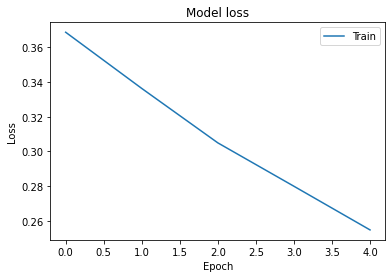

In [41]:
#plot loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

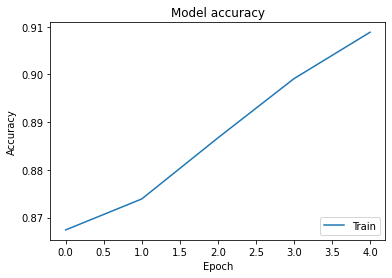

In [42]:
#plot akurasi
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

In [66]:
import numpy as np

teks = ["I think that items is not bad"]
test = tokenizer.texts_to_sequences(teks)
test1 = pad_sequences(test)
classes=model.predict(test1)
# print(classes)

label=['Very Bad', 'Bad', 'Enough', 'Good', 'Very Good']
print("Komentar tersebut termasuk klasifikasi rating : ", label[np.argmax(classes)])

Komentar tersebut termasuk klasifikasi rating :  Enough
